## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Resources](#resources)


<a id='intro'></a>
### Introduction

This project runs an A/B test on an e-commerce website to determine if the company should implement their new page, keep the old page, or perhaps run the experiment longer before making a decision.

<a id='probability'></a>
#### Part I - Probability
To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Setting the seed to assure I get the same answers on quizzes
random.seed(42)

In [2]:
# import ab_data.csv and display first 5 rows
df = pd.read_csv('./ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
# view df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [4]:
# checking the length of dataframe with number of entries
print ('\nThere are {} rows in this dataframe.'.format(len(df)))

# using len() and unique() to count the number of of unique rows
uniqueRows = len(pd.unique(df['user_id']))
print ('\nThere are {} unique rows in this dataframe.'.format(uniqueRows))


There are 294478 rows in this dataframe.

There are 290584 unique rows in this dataframe.


In [5]:
# np.mean() can be used to calculate the proportion of converted users
np.mean(df['converted'] == 1)

0.11965919355605512

In [6]:
# The number of times the new_page and treatment don't line up.
# adding rows where <group> equals 'treatment' and <landing_page> does not equal 'new_page'
treatment_notAligned = ((df['group'] == 'treatment') & (df['landing_page'] != 'new_page'))
treatment_notAligned.sum()

1965

In [7]:
# There are not any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [8]:
# For the rows where treatment is not aligned with new_page or control is not aligned with old_page
# we cannot be sure if this row truly received the new or old page.
# adding rows where <group> equals 'control' and <landing_page> does not equal 'old_page'
control_notAligned = ((df['group'] == 'control') & (df['landing_page'] != 'old_page'))
control_notAligned.sum()

1928

In [9]:
# Creating new dataset
df2 = df[(treatment_notAligned != True) & (control_notAligned != True)]

# Verify you removed unwanted rows
treatment_notAligned2 = ((df2['group'] == 'treatment') & (df2['landing_page'] != 'new_page'))
control_notAligned2 = ((df2['group'] == 'control') & (df2['landing_page'] != 'old_page'))

# Sum should be zero if unwanted rows were removed correclty
treatment_notAligned2.sum() + control_notAligned2.sum()

0

In [10]:
# Use len() and unique() to calculate unique user_ids in df2
len(pd.unique(df2['user_id']))

290584

In [11]:
# There is one user_id repeated in df2
# Locating duplicate id
df2['user_id'][df2.duplicated(['user_id'], keep=False)]

1899    773192
2893    773192
Name: user_id, dtype: int64

In [12]:
# Locating row information for duplicate user_id
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [13]:
print('There are {} rows in df2.'.format(len(df2)))

There are 290585 rows in df2.


In [14]:
# Removing one of the duplicated rows from df2
df2 = df2.drop_duplicates(subset=['user_id'], keep='first')

In [15]:
print('There are {} rows in df2.'.format(len(df2)))

There are 290584 rows in df2.


In [16]:
# Calculated probability of converting regardless of page. Multiplied by 100 and rounded value.
calcProb = df2['converted'].sum()/df2['converted'].count()
calcProbClean = (calcProb * 100).round(2)

print('Overall Probability: {}'.format(calcProb))
print('Clean Overall Prob: {}%'.format(calcProbClean))

Overall Probability: 0.11959708724499628
Clean Overall Prob: 11.96%


In [17]:
# Calculated probability of converting w/in control group. Multiplied by 100 and rounded value.
controlGroup = df2['group'][(df['group'] == 'control')].count()
controlConverted = df2['group'][(df['group'] == 'control') & (df2['converted'] == 1)].count()
calcProb2 = controlConverted/controlGroup
calcProbClean2 = (calcProb2 * 100).round(2)

print('Control Probability: {}'.format(calcProb2))
print('Clean Control Prob: {}%'.format(calcProbClean2))

Control Probability: 0.1203863045004612
Clean Control Prob: 12.04%


In [18]:
# Calculated probability of converting w/in treatment group. Multiplied by 100 and rounded value.
treatmentGroup = df2['group'][(df['group'] == 'treatment')].count()
treatmentConverted = df2['group'][(df['group'] == 'treatment') & (df2['converted'] == 1)].count()
calcProb3 = treatmentConverted/treatmentGroup
calcProbClean3 = (calcProb3 * 100).round(2)

print('Treatment Probability: {}'.format(calcProb3))
print('Clean Treatment Prob: {}%'.format(calcProbClean3))

Treatment Probability: 0.11880806551510564
Clean Treatment Prob: 11.88%


In [19]:
# Calculated probability of receiving the new page. Multiplied by 100 and rounded value.
probNewPage = df2['landing_page'][df2['landing_page'] == 'new_page'].count()/df2['landing_page'].count()
cleanNewPage = (probNewPage * 100 ).round(2)

print('New Page Probability: {}'.format(probNewPage))
print('Clean New Page Prob: {}%'.format(cleanNewPage))

New Page Probability: 0.5000619442226688
Clean New Page Prob: 50.01%


The data suggests the control group has a probable conversion rate of roughly 12%, while the treatment group has a probable conversion rate of approximately 11.8%. Since conversion is lower in the treatment group, the data suggest a new page does not lead to increased conversion. Although the control group has a higher conversion rate, more study is needed to determine whether there is a significant difference.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed. However, the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?

<li/>H<sub>0</sub>: P<sub>new</sub> - P<sub>old</sub> <= 0
<li/>H<sub>a</sub>: P<sub>new</sub> - P<sub>old</sub> > 0

The null hypothesis states the difference between new and old page is less than or equal to zero (suggesting conversion rate will not change based on which page users receive). While the alternative hypothesis states the difference is greater than zero (suggesting there will be an increase in conversion with users receiving the new page). Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

In [20]:
# Conversion rate for new page
# removed this line of code since pNew and pOld should equal overall conversion rate: pNew = df2[df2['landing_page']=='new_page']['converted'].mean()
pNew = pOld = calcProb
pNew

0.11959708724499628

In [21]:
# Conversion rate for old page
# removed this line of code: pOld = df2[df2['landing_page']=='old_page']['converted'].mean()
pOld

0.11959708724499628

In [22]:
# Count the number of unique values in column <landing_page>
counts = df2['landing_page'].value_counts()
counts

new_page    145310
old_page    145274
Name: landing_page, dtype: int64

In [23]:
# Return the number of times <new_page> exists in column <landing_page>
nNew = counts['new_page']
nNew

145310

In [24]:
# Return the number of times <old_page> exists in column <landing_page>
nOld = counts['old_page']
nOld

145274

In [25]:
# Mean of the two probabilities
pMean = np.mean([pNew,pOld])
pMean

0.11959708724499628

In [26]:
# Subtract pMean from 1
oneMinusP = 1-pMean
oneMinusP

0.8804029127550037

In [27]:
# Simulated conversion rate of Pnew uner the null
new_page_converted = np.random.choice([1,0], size = nNew, p=[pMean,oneMinusP])
new_page_converted.mean()

0.11954442226963044

In [28]:
old_page_converted = np.random.choice([1,0], size = nOld, p=[pMean,oneMinusP])
old_page_converted.mean()

0.11913349945620001

In [29]:
# Difference of simulated values
new_page_converted.mean() - old_page_converted.mean()

0.00041092281343042825

In [30]:
# Running the simulation 10,000 times takes roughly 1min 30s to complete
# Each itteration of for loop appends difference of simulated values to list

diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1,0], size = nNew, p=[pNew,oneMinusP])
    old_page_converted = np.random.choice([1,0], size = nOld, p=[pOld,oneMinusP])
    pDiff = new_page_converted.mean() - old_page_converted.mean()
    diffs.append(pDiff)

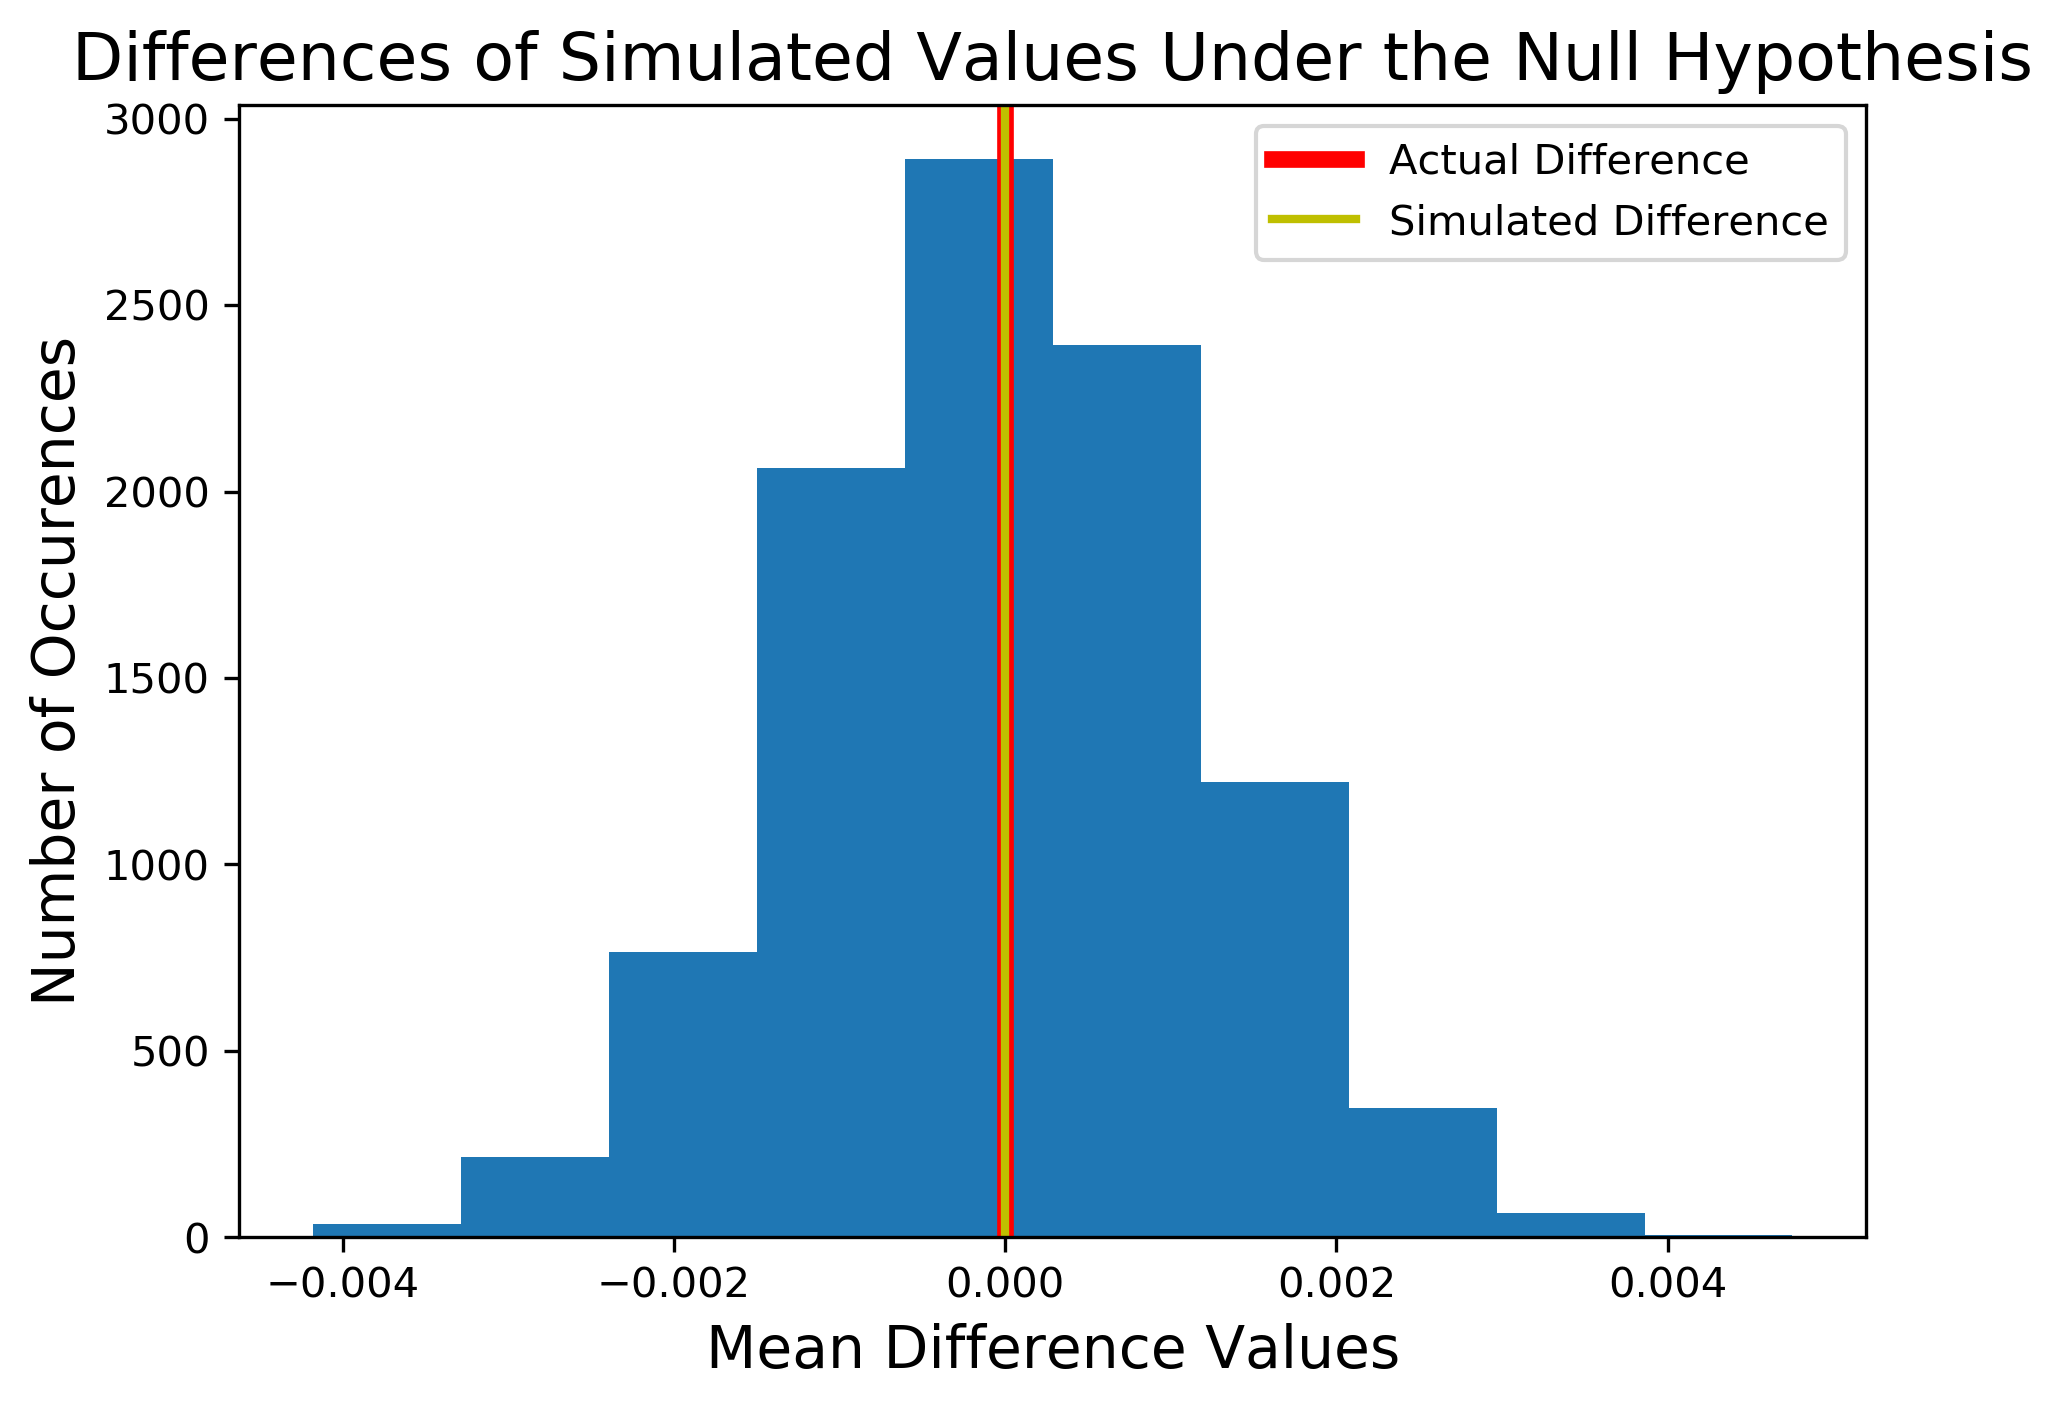

In [31]:
# low, upper = np.percentile(diffs,2.5),np.percentile(diffs, 97.5)
pDifference = pNew - pOld
pDiffs = np.array(diffs)
avgDiffs = np.array(pDiffs).mean()
fig, ax = plt.subplots(figsize=(7, 5),dpi=300)
plt.hist(pDiffs)
plt.axvline(x=pDifference, color='r', linewidth=4, label='Actual Difference')
plt.axvline(x=avgDiffs, color='y', linewidth=2, label='Simulated Difference')
plt.title('Differences of Simulated Values Under the Null Hypothesis', fontsize=16)
plt.xlabel('Mean Difference Values', fontsize=14)
plt.ylabel('Number of Occurences', fontsize=14)
plt.legend()
plt.show()

In [32]:
# The proportion of p_diffs that are greater than the actual observed difference.
# This value should be ≈ 0.9
actualDiff = df2[df2['group'] == 'treatment']['converted'].mean() - df2[df2['group'] == 'control']['converted'].mean()
(actualDiff < pDiffs).mean()

0.9098

The proportion of p_diffs that are greater than the actual observed difference (0.9054) corresponds to the p-value listed in section *m*.

The p-value is used to provide a level of significance at which the null hpyothesis can be rejected. A small p-value (*i.e. <= 0.05*) would provide evidence to reject the null hypothesis in favor of the alternative. A large p-value (*i.e. > 0.05*) would provide evidence to fail to reject the null hypothesis. The p-value (0.5049) is considered high and close to 1. Since the p-value is high, we fail to reject the null hypothesis.

In [33]:
# Number of conversions for each page type
convert_old = len(df2[(df2['landing_page']=='old_page')&(df2['converted']==1)])
convert_new = len(df2[(df2['landing_page']=='new_page')&(df2['converted']==1)])

# values determined earlier
n_old = nOld
n_new = nNew

print('convert_old:', convert_old)
print('convert_new:',convert_new)
print('n_old:', n_old)
print('n_new:', n_new)

convert_old: 17489
convert_new: 17264
n_old: 145274
n_new: 145310


In [34]:
import statsmodels.api as sm
from scipy.stats import norm

# Calculating p and z scores. Parameters are used for count and nobs
# count are number of successes parameter
# nobs are trial parameters
value = pNew - pOld
z_score, p_value = sm.stats.proportions_ztest(count = [convert_new,convert_old], 
                                              nobs = [n_new,n_old], 
                                              value=value, 
                                              alternative='larger', 
                                              prop_var=False)
print('value:',value)
print('z_score:',z_score)
print('p_value:',p_value)

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


value: 0.0
z_score: -1.3109241984234394
p_value: 0.9050583127590245


In [35]:
# Critical value at 95% confidence
norm.ppf(1-0.05/2)

1.959963984540054

The z-score suggests each standard deviation away from the mean is roughly 1.31 units. Since the z-score (-1.3109241984234394) does not exceed the critical values (±1.959963984540054), we fail to reject the null hypothesis.

The p-value is approximately 0.9, which is larger than 0.05. This also indicates weak evidence against the null hypothesis. Again, we fail to reject the null hypothesis. This corresponds with my answer in part *j* and *k*.

<a id='regression'></a>
### Part III - A regression approach

In this final part, you will see that the result acheived in the previous A/B test can also be acheived by performing regression. We will use a logistic regression, *sm.Logit()*, which is used to help predict a binary outcome.

In [36]:
# Add two new columns to dataframe
df2[['ab_page', 'intercept']] = pd.get_dummies(df2['group'])
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1


In [37]:
# No missing values
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 7 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
ab_page         290584 non-null uint8
intercept       290584 non-null int64
dtypes: int64(3), object(3), uint8(1)
memory usage: 25.8+ MB


In [38]:
# Use **statsmodels** to import your regression model.
# Instantiate the model, and fit the model using the two columns you created in part b. 
# to predict whether or not an individual converts.
logit_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [39]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-05-27 14:13 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -2.0038    0.0081  -247.1457  0.0000  -2.0197  -1.9879
ab_page       0.0150    0.0114     1.3109  0.1899  -0.0074   0.0374
==================================================================

"""

The p-value associated with ab_page is 0.1899, wich is approximately 0.19. This value can be interchanged using the formula 1-(0.19/2) = 0.905, which corresponds to the p-value I calculated earlier. It suggests I should we should fail to reject the null hypothesis.

Thoughts to address:
* I used summary() in Udacity's Jupyter Notebook environment. It worked fine.
* But, summary() does not work on my local machine. However, [summary2()](#resource1) does.
* I am not sure why
----

The world is complicated. Many factors can contribute to an observed item of interest (*e.g. The increase in conversion rate of a website*). Since multiple variables can impact conversion rate in this case, it is essential to identify them and measure their impact. 

One disadvantage of too many variables is you could overfit your model. Too many terms can overcomplicate your dataset. Meaning the model is fit to the random noise in your data set rather than truly representing the population. *[source: Five Reasons Why Your R-squared Can Be Too High](#resource3)*.

In [40]:
# Import countries.csv data
dfCountry = pd.read_csv('countries.csv')
dfCountry.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [41]:
# Joining ab test table with countries table
merged = df2.merge(dfCountry, on='user_id')
merged.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,US


In [42]:
# Creating dummy variables for country column
merged[['CA', 'UK', 'US']] = pd.get_dummies(merged['country'])
merged.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,US,0,0,1


In [43]:
# Stats model logit() and fit() countries
logit_country = sm.Logit(merged['converted'],merged[['intercept','UK', 'US']])
result_merged = logit_country.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [44]:
# Summary of results
result_merged.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-05-27 14:13 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

The p-values for both UK and US are greater than 0.05. This data suggests we should fail to reject the null hypothesis.

In [45]:
# summary results
logit_pageCountry = sm.Logit(merged['converted'],merged[['ab_page', 'intercept', 'UK', 'US']])
result_pageCountry = logit_pageCountry.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [46]:
result_pageCountry.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-05-27 14:13 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
ab_page        0.0149    0.0114    1.3069  0.1912  -0.0075   0.0374
intercept     -2.0450    0.0266  -76.8197  0.0000  -2.0971  -1.9928
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

The p-values for ab_page, UK, and US are greater than 0.05. Again, the data suggests we should fail to reject the null hypothesis.

<a id='conclusions'></a>
## Conclusions

Although the data suggests a difference in conversion rate between new and old pages, the z-scores and p-values provide evidince that suggests we should fail to reject the null hypothesis. Meaning, the differnce between new and old page conversion rates are statistically less than or equal to zero.

Since there is not a significant difference in conversion between new and old page, I recommend reallocating resources to drive conversion, or finding additional variables to test that might drive conversion.

<a id='resources'></a>
## Resources


<a id='resource1'></a>
#### 1. *[Summary2()](http://www.statsmodels.org/dev/generated/statsmodels.iolib.summary2.Summary.html)*

<a id='resource2'></a>
#### 2. *[source: Five Reasons Why Your R-squared Can Be Too High](http://blog.minitab.com/blog/adventures-in-statistics-2/five-reasons-why-your-r-squared-can-be-too-high)*